In [29]:
import numpy as np
from numpy.random import default_rng
from scipy import special
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go

from spec_class import Spec

In [30]:
# https://lmfit.github.io/lmfit-py/builtin_models.html
from lmfit import Model, Minimizer, minimize, Parameters, report_fit, fit_report, printfuncs
from lmfit.models import LinearModel, StepModel, ExponentialModel, LorentzianModel
from lmfit.models import GaussianModel, SkewedGaussianModel, ExpressionModel

In [31]:
from ograyspy_class import Ograyspy

In [32]:
ogra = Ograyspy(batch_mode=False)
print('Objeto ogra: Ograyspy criado.')
print(f'ogra.info_plat: {ogra.info_plat}')
print(f'ogra.info_mach: {ogra.info_mach}')
print(f'ogra.info_syst: {ogra.info_syst}')
print(f'ogra.info_node: {ogra.info_node}')
print(f'ogra.home_path: {ogra.home_path}')

Objeto ogra: Ograyspy criado.
ogra.info_plat: Windows-10-10.0.19044-SP0
ogra.info_mach: AMD64
ogra.info_syst: Windows
ogra.info_node: I56611
ogra.home_path: C:\Users\mmaduar


In [33]:
# f_name = '../../Genie_Transfer/Si/SI2019/SI04119.Chn'
# f_name = '../gamma/spectra/ALMERA-2016/alm_samp5_sedim_16.IEC'

In [34]:
to_be_found = 'Genie_Transfer'
# to_be_found = 'some_spectra'
print('\nogra.define_files_folder(to_be_found)')
ogra.define_files_folder(to_be_found)




ogra.define_files_folder(to_be_found)
Found folder name:  C:\Users\mmaduar\Nextcloud\Genie_Transfer
Partes:  ('C:\\', 'Users', 'mmaduar', 'Nextcloud', 'Genie_Transfer')
No. spec files:  6813


In [35]:
print(f'\n\nogra.select_spectrum({a_pattern})')
ogra.select_spectrum(a_pattern)
print(f'A spec name: {ogra.a_spec_name}')
print(f'Reduced file name: {ogra.reduced_f_name}')

# AQUI: ativar gener_dataframe qdo estiver pronto.
ogra.perform_total_analysis(peak_sd_fact=3.0, gener_dataframe=True)
# print(ogra.a_spec.spec_pks_df)



ogra.select_spectrum(CCI1603-I)
Existing:
Achou! indice=4567, nomearq = Filtros/2022/Cci/CCI1603-I.Chn
Final choices:
spectra_path: C:\Users\mmaduar\Nextcloud\Genie_Transfer
a_spec_name: C:\Users\mmaduar\Nextcloud\Genie_Transfer\Filtros\2022\Cci\CCI1603-I.Chn
reduced_f_name: Filtros/2022/Cci/CCI1603-I.Chn
A spec name: C:\Users\mmaduar\Nextcloud\Genie_Transfer\Filtros\2022\Cci\CCI1603-I.Chn
Reduced file name: Filtros/2022/Cci/CCI1603-I.Chn
k_sep_pk:  2.0
smoo:  4096
widths_range:  (4.0, 20.0)
Exec peaks_search(gross=True), espectro ORIGINAL
resolve_peaks_and_regions:
define_multiplets_regions completado. Define: self.mix_regions.
resolve_peaks_and_regions:
define_multiplets_regions completado. Define: self.mix_regions.
{'net_spec_ser_an': <generic_series_analysis_class.GenericSeriesAnalysis object at 0x0000017AA08D9AF0>, 'final_composed_baseline': <generic_series_analysis_class.GenericSeriesAnalysis object at 0x0000017AA08D9970>, 'f_name': WindowsPath('C:/Users/mmaduar/Nextcloud/Genie

In [36]:
ogra.call_graphics()

In [37]:
rng = np.random.default_rng()
# rints = rng.integers(low=0, high=10, size=3)

# 2022-Jun-23: Reativar após consertar o arquivo pickle:
# rints = rng.integers(pkl_df1.count()[0], size=3)
# print(rints)
# type(rints[0])
# some_spec = rints[1]
# pkl_df1.iloc[some_spec]
# a_spec_name = pkl_df1.iloc[some_spec]['FName']
# a_spec_name

In [38]:
# 2022
# Se quiser ignorar o espectro aleatório, definir aqui um específico. Se não, pular.
# Vou ignorar o espectro já analisado e refazer a análise, para testes.
# 2022-Mar-24 Resolver essa questão dos nomes de arquivos em Linux e Windows
# a_spec_name = '..\\..\\Genie_Transfer\\Si\\2018\\PNR\\PRN0803.Chn'
# a_spec_name = '../../Genie_Transfer/Si/2018/PNR/PRN0803.Chn'
# a_spec_name = '../../Genie_Transfer/Si/2018/CTP/CTP0908-2.Chn'
# Esse é um que dá problema na baseline perto do 159 keV do I-123:
# a_spec_name = '../../Genie_Transfer/Si/2018/CCI/CCI1508I.Chn'
# Precisa quebrar mais a baseline: Ok, consertado!!!
# 2022: Já usando o GMX:
# a_spec_name = '../../Genie_Transfer/Filtros/2022/Cci/CCI1603-I.Chn'



In [39]:

# 2022-out-7: Excelente espectro para testes, tenho usado ultimamente:
a_pattern = 'Si/SI2018/SI11318.Chn'
# 2022-nov-16: outros espectros:
# a_pattern = "Filtros/2022/Cci/CCI1603-I.Chn"
# a_pattern = "Filtros/2022/Cci/CCI2302-I.Chn"

# a_pattern = "Eso_non_existe.Chn"

# 2022-Dez-21 Buscando outro espectro
# a_pattern = 'CCI1603-I'
ogra.select_spectrum(a_pattern)

Existing:
Achou! indice=6643, nomearq = Si/SI2018/SI11318.Chn
name:  C:\Users\mmaduar\Nextcloud\Genie_Transfer\Si\SI2018\SI11318.Chn
Final choices:
spectra_path: C:\Users\mmaduar\Nextcloud\Genie_Transfer
a_spec_name: C:\Users\mmaduar\Nextcloud\Genie_Transfer\Si\SI2018\SI11318.Chn
reduced_f_name: Si/SI2018/SI11318.Chn


In [40]:
print(f'A spec name: {ogra.a_spec_name}')
print(f'Reduced file name: {ogra.reduced_f_name}')

A spec name: C:\Users\mmaduar\Nextcloud\Genie_Transfer\Si\SI2018\SI11318.Chn
Reduced file name: Si/SI2018/SI11318.Chn


In [41]:
# adsfgaedf sead
ogra.reduced_names_files_list[4567]

'Filtros/2022/Cci/CCI1603-I.Chn'

In [42]:
ogra.perform_total_analysis()
vars(ogra.a_spec)

k_sep_pk:  2.0
smoo:  4096
widths_range:  (4.0, 20.0)
Exec peaks_search(gross=True), espectro ORIGINAL
resolve_peaks_and_regions:
define_multiplets_regions completado. Define: self.mix_regions.
resolve_peaks_and_regions:
define_multiplets_regions completado. Define: self.mix_regions.
{'net_spec_ser_an': <generic_series_analysis_class.GenericSeriesAnalysis object at 0x0000017AA08F5160>, 'final_composed_baseline': <generic_series_analysis_class.GenericSeriesAnalysis object at 0x0000017AA08F5070>, 'f_name': WindowsPath('C:/Users/mmaduar/Nextcloud/Genie_Transfer/Si/SI2018/SI11318.Chn'), 'reduced_f_name': 'Si/SI2018/SI11318.Chn', 'sufx': '.chn', 'spec_io': None, 'pkl_file': WindowsPath('C:/Users/mmaduar/Nextcloud/Genie_Transfer/Si/SI2018/SI11318.pkl'), 'gross_spec_ser_an': <generic_series_analysis_class.GenericSeriesAnalysis object at 0x0000017AA0B2A640>, 'spec_pks_df': Empty DataFrame
Columns: []
Index: []}
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format_

{'net_spec_ser_an': <generic_series_analysis_class.GenericSeriesAnalysis at 0x17aa08f5160>,
 'final_composed_baseline': <generic_series_analysis_class.GenericSeriesAnalysis at 0x17aa08f5070>,
 'f_name': WindowsPath('C:/Users/mmaduar/Nextcloud/Genie_Transfer/Si/SI2018/SI11318.Chn'),
 'reduced_f_name': 'Si/SI2018/SI11318.Chn',
 'sufx': '.chn',
 'spec_io': None,
 'pkl_file': WindowsPath('C:/Users/mmaduar/Nextcloud/Genie_Transfer/Si/SI2018/SI11318.pkl'),
 'gross_spec_ser_an': <generic_series_analysis_class.GenericSeriesAnalysis at 0x17aa0b2a640>,
 'spec_pks_df': Empty DataFrame
 Columns: []
 Index: []}

In [43]:
# 2022-Jun-24 Lembrando como estão os defaults de total_analysis(...):
# def total_analysis(self, k_sep_pk=2.0, smoo=3000.0, widths_range=(4.0, 20.0)):

In [44]:
# smoo=3000 fica razoável, mas faz umas ondas
# smoo=1500 fica horrível, faz uns abismos. Quanto menor, pior
# smoo=400 fica razoável, mas faz umas ondas
ogra.perform_total_analysis(
    k_sep_pk=2.0, smoo=4096, widths_range=(4.0, 20.0)
)

k_sep_pk:  2.0
smoo:  4096
widths_range:  (4.0, 20.0)
Exec peaks_search(gross=True), espectro ORIGINAL
resolve_peaks_and_regions:
define_multiplets_regions completado. Define: self.mix_regions.
resolve_peaks_and_regions:
define_multiplets_regions completado. Define: self.mix_regions.
{'net_spec_ser_an': <generic_series_analysis_class.GenericSeriesAnalysis object at 0x0000017AA0B4B5E0>, 'final_composed_baseline': <generic_series_analysis_class.GenericSeriesAnalysis object at 0x0000017AA0B2A670>, 'f_name': WindowsPath('C:/Users/mmaduar/Nextcloud/Genie_Transfer/Si/SI2018/SI11318.Chn'), 'reduced_f_name': 'Si/SI2018/SI11318.Chn', 'sufx': '.chn', 'spec_io': None, 'pkl_file': WindowsPath('C:/Users/mmaduar/Nextcloud/Genie_Transfer/Si/SI2018/SI11318.pkl'), 'gross_spec_ser_an': <generic_series_analysis_class.GenericSeriesAnalysis object at 0x0000017AA0B4B370>, 'spec_pks_df': Empty DataFrame
Columns: []
Index: []}
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format_

In [45]:
# 2022-Jun-24 No momento esses são os que interessam:
# pann = ogra.a_spec..saw_spec.spec_parms
cntarr = ogra.a_spec.net_spec_ser_an.y_s
pkprms = ogra.a_spec.net_spec_ser_an.pk_parms

In [46]:
# 2022-Jun-14
# Verificando o que se tem até agora em a_raw_spec:
# (Pode pular e ir direto aos gráficos)

In [47]:

# Testes:
# https://numpy.org/doc/stable/reference/random/generator.html#distributions
# x = np.linspace(0, 10, N) + rng.normal(loc=7, scale=0.05, size=N)
# y = np.linspace(22, 23, N)

# Busca do canal onde a altura do espectro se "estabiliza"
# https://numpy.org/doc/stable/reference/routines.sort.html#searching

# Escolha do que plotar:
# y_plot = noisy_y
# y_plot = var_win
# y_plot = var_rel

In [48]:
# Initialize figure
ogra.call_graphics()

In [49]:
vars(pkprms)

{'k_fwhm_to_sd': 0.42466090014400953,
 'peaks': array([  52,  111,  131,  282,  294,  384,  434,  570,  597,  699,  760,
         782,  793,  815,  878,  931,  939,  957, 1013, 1072, 1270, 1334,
        1512, 1569, 1654, 1671, 1704, 1805, 1892, 1910, 2817, 2939],
       dtype=int64),
 'pk_hei': array([], dtype=float64),
 'widths': (None, None),
 'mix_regions': array([], dtype=float64),
 'plateaux': array([], dtype=float64),
 'fwhm_plateaux': array([], dtype=float64),
 'wide_regions': array([[  51,   53],
        [ 109,  114],
        [ 129,  133],
        [ 279,  285],
        [ 291,  296],
        [ 382,  387],
        [ 431,  436],
        [ 567,  573],
        [ 592,  602],
        [ 696,  703],
        [ 757,  763],
        [ 780,  785],
        [ 790,  795],
        [ 812,  817],
        [ 875,  882],
        [ 927,  934],
        [ 936,  941],
        [ 954,  961],
        [1010, 1016],
        [1069, 1075],
        [1267, 1273],
        [1331, 1338],
        [1508, 1515],
      

In [50]:
# 2022-Dez-21 Achar o pico de maior área inicial do espectro:

In [51]:
largest_pk = np.argmax(pkprms.rough_sums)
pkprms.centroids[largest_pk]

1334.1184194028456

In [52]:
# Só pra lembrar como faz divisão inteira
21 // 7

3

In [53]:
wi_re = pkprms.wide_regions[largest_pk]
x = np.linspace(wi_re[0], wi_re[1], num=wi_re[1]-wi_re[0]+1)
y = cntarr[wi_re[0]:wi_re[1]+1]
c1 =  pkprms.centroids[largest_pk]
s1 = pkprms.propts['widths'][largest_pk]*pkprms.k_fwhm_to_sd
a1 = pkprms.rough_sums[largest_pk]
# c2 = 313
# s2 = 1.5
# a2 = 400
sste = 2.0

In [54]:
vars(pkprms)

{'k_fwhm_to_sd': 0.42466090014400953,
 'peaks': array([  52,  111,  131,  282,  294,  384,  434,  570,  597,  699,  760,
         782,  793,  815,  878,  931,  939,  957, 1013, 1072, 1270, 1334,
        1512, 1569, 1654, 1671, 1704, 1805, 1892, 1910, 2817, 2939],
       dtype=int64),
 'pk_hei': array([], dtype=float64),
 'widths': (None, None),
 'mix_regions': array([], dtype=float64),
 'plateaux': array([], dtype=float64),
 'fwhm_plateaux': array([], dtype=float64),
 'wide_regions': array([[  51,   53],
        [ 109,  114],
        [ 129,  133],
        [ 279,  285],
        [ 291,  296],
        [ 382,  387],
        [ 431,  436],
        [ 567,  573],
        [ 592,  602],
        [ 696,  703],
        [ 757,  763],
        [ 780,  785],
        [ 790,  795],
        [ 812,  817],
        [ 875,  882],
        [ 927,  934],
        [ 936,  941],
        [ 954,  961],
        [1010, 1016],
        [1069, 1075],
        [1267, 1273],
        [1331, 1338],
        [1508, 1515],
      

[[Model]]
    Model(gaussian, prefix='g1_')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 8
    # variables        = 3
    chi-square         = 65404.4594
    reduced chi-square = 13080.8919
    Akaike info crit   = 78.0712334
    Bayesian info crit = 78.3095581
    R-squared          = 0.99967060
[[Variables]]
    g1_amplitude:  37830.1631 +/- 272.363652 (0.72%) (init = 37918.32)
    g1_center:     1334.14378 +/- 0.00887867 (0.00%) (init = 1334.118)
    g1_sigma:      1.06743447 +/- 0.00886322 (0.83%) (init = 1.105136)
    g1_fwhm:       2.51361604 +/- 0.02087129 (0.83%) == '2.3548200*g1_sigma'
    g1_height:     14138.6218 +/- 101.768105 (0.72%) == '0.3989423*g1_amplitude/max(1e-15, g1_sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(g1_amplitude, g1_sigma) = 0.577


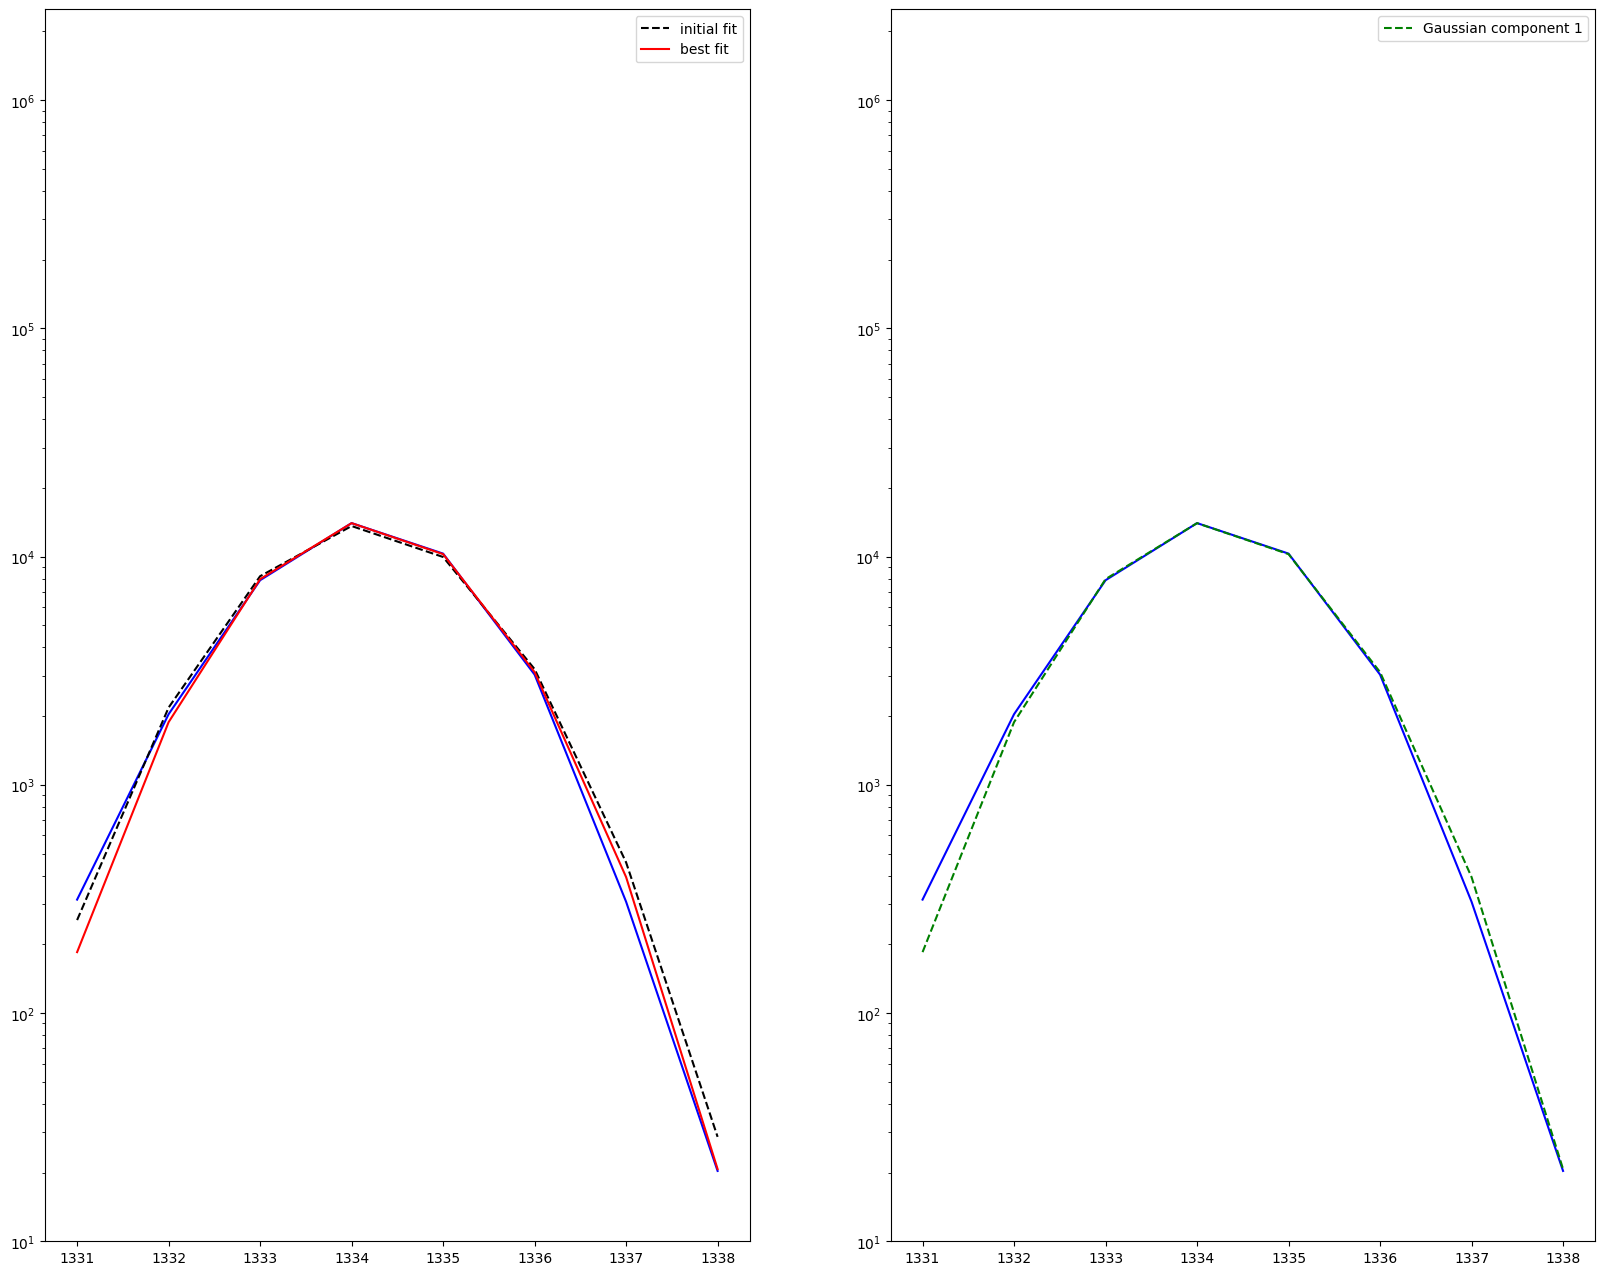

In [55]:
pars = Parameters()

# line_mod = LinearModel(prefix='line_')
# pars.update(line_mod.make_params())
# pars['line_intercept'].set(value=200, min=50, max=400)
# pars['line_slope'].set(value=0, min=-0.001, max=0.001)
                      
# exp_mod = ExponentialModel(prefix='exp_')
# pars = exp_mod.guess(y, x=x)

gauss1 = GaussianModel(prefix='g1_')
pars.update(gauss1.make_params())
pars['g1_center'].set(value=c1, min=c1-2, max=c1+2)
pars['g1_sigma'].set(value=s1, min=0.5, max=10)
pars['g1_amplitude'].set(value=a1, min=10)

# mod = gauss1 + gauss2 + line_mod - step_mod
# mod = gauss1 + gauss2 - step_mod
mod = gauss1

init = mod.eval(pars, x=x)
out = mod.fit(y, pars, x=x)

print(out.fit_report(min_correl=0.1))

fig, axes = plt.subplots(1, 2, figsize=(20, 16))
axes[0].set_yscale('log')
axes[1].set_yscale('log')
axes[0].set_ylim([10, 2.5e6])
axes[1].set_ylim([10, 2.5e6])

axes[0].plot(x, y, 'b')
axes[0].plot(x, init, 'k--', label='initial fit')
axes[0].plot(x, out.best_fit, 'r-', label='best fit')
axes[0].legend(loc='best')

comps = out.eval_components(x=x)
axes[1].plot(x, y, 'b')
axes[1].plot(x, comps['g1_'], 'g--', label='Gaussian component 1')
# axes[1].plot(x, comps['g2_'], 'm--', label='Gaussian component 2')
# axes[1].plot(x, comps['line_'], 'k--', label='Linear component')
# axes[1].plot(x, -comps['step_'], 'r--', label='Step component')
# axes[1].plot(x, comps['exp_'], 'k--', label='Exponential component')
axes[1].legend(loc='best')

# plt.show()
# <end examples/doc_builtinmodels_nistgauss.py>

In [56]:
xfgn sr hsrthf srth

SyntaxError: invalid syntax (1926381993.py, line 1)

In [ ]:

# 2022-Dez-21:
# PAREI AQUI;
# Usar os resultados de áreas dos picos e montar as curvas de eficiência

# 2022-Mar-16
# Fazendo ajuste polinomial nas eficiências:

In [ ]:
from numpy.polynomial import Polynomial as P # 2020-09-06 Esta é a nova classe recomendada 

In [ ]:
En_CV_LoBg = np.array([81.00,
86.54,
121.78,
133.51,
302.85,
344.28,
356.02,
604.69,
661.66,
795.84,
964.13,
1085.91,
1112.12,
1173.24,
1332.50,
1408.01
])
En_CV_GMX

In [ ]:
Eff_CV_LoBg = np.array([4.4358,
4.4723,
5.4386,
5.5045,
3.1379,
2.8722,
2.7305,
1.7817,
1.6453,
1.4026,
1.1216,
1.0200,
0.9703,
0.8962,
0.8009,
0.7397 ])
Eff_CV_GMX

In [ ]:
unc_perc = np.array([2.01,
1.43,
1.33,
2.11,
1.81,
1.42,
1.41,
2.24,
1.44,
3.68,
1.66,
1.71,
1.58,
0.87,
0.87,
1.51 ])
unc_perc

In [ ]:
ln_En_CV_LoBg = np.log (En_CV_LoBg)
ln_Eff_CV_LoBg = np.log (Eff_CV_LoBg)

In [ ]:
N = 16

In [ ]:
# 2022-Mar-23
# Parêntese para fazer nova calibração canal-energia do HPGe do projeto:

In [ ]:
canal = np.array([210, 920, 1181, 7232])
ener = np.array([46.5, 186, 238.6, 1460.8])

In [ ]:
projeto = P.fit(x=canal, y=ener, deg=1).convert()
projeto

In [ ]:
projeto_ener_canal = P.fit(x=ener, y=canal, deg=1).convert()
projeto_ener_canal

In [ ]:
projeto_ener_canal(1173.2)

In [ ]:
projeto_ener_canal(1332.486)

In [ ]:
P.fit(x=ln_En_CV_LoBg, y=ln_Eff_CV_LoBg, deg=5).convert()

In [ ]:
poly_w = P.fit(x=ln_En_CV_LoBg, y=ln_Eff_CV_LoBg, deg=5, w=1/unc_perc).convert()
poly_w

In [ ]:
poly_w = P.fit(x=ln_En_CV_LoBg, y=ln_Eff_CV_LoBg, deg=5, w=1/unc_perc**2).convert()
poly_w

In [ ]:
print(poly_w)

In [ ]:
poly_o = P.fit(x=ln_En_CV_LoBg, y=Eff_CV_LoBg, deg=5)
print(poly_o)

In [ ]:
weights = np.linspace(1, 2, N)
Xw = X * np.sqrt(weights)[:, None]
yw = y * np.sqrt(weights)
print (linalg.lstsq(Xw, yw)[0])

In [ ]:
weights = 1.0 / unc_perc**2.0
weights

In [ ]:
Xw = ln_En_CV_LoBg * np.sqrt(weights)[:, None]
yw = ln_Eff_CV_LoBg * np.sqrt(weights)
print (linalg.lstsq(Xw, yw)[0])

In [ ]:
print (linalg.lstsq(Xw, yw))

In [ ]:
X = ln_En_CV_LoBg
y = ln_Eff_CV_LoBg
w1 = linalg.lstsq(X, y)
print (w1)

In [ ]:
np.log(2)

In [ ]:
# Figure 3
figw3 = go.FigureWidget();
figw3.add_trace(
    go.Scatter(x=chans,
               y=ys_net_counts,
               name="Net counts",
               line=dict(color='green',width=0.5)));
figw3.add_trace(
    go.Scatter(x=peaks_net,
               y=ys_net_counts[peaks_net],
               mode="markers",
               name="net peaks",
               marker=dict(color='cyan',
                           symbol='cross',
                           size=15,
                           opacity=0.7,
                           line=dict(color='magenta', width=2.0)
                          )
              ));
figw3.add_trace(
    go.Scatter(x=peaks_1,
               y=counts[peaks_1],
               mode="markers",
               name="gross peaks",
               marker=dict(color='lightblue',
                           symbol='cross',
                           size=15,
                           opacity=0.7,
                           line=dict(color='green', width=2.0)
                          )
              ));
# Set title and scale type
figw3.update_layout(title_text="Gamma-ray net spectrum")
figw3.update_yaxes(type="log");

In [ ]:
figw3.write_html('figw3.html', auto_open=True)

In [ ]:
# Essa será a 1b
figw1 = go.FigureWidget();

# Add Traces

figw1.add_trace(
    go.Scatter(x=chans_nzero,
               y=counts_nzero,
               error_y=dict(
                   color='orange',width=3.0,
                   type='data', # value of error bar given in data coordinates
                   array=unc_y,
                   visible=True),
               name="Counts & uncertaintes",
               line=dict(color='orange',width=0.3)));

figw1.add_trace(
    go.Scatter(x=chans,
               y=eval_y,
               name="eval_y",
               line=dict(color='blue',width=0.5)));

figw1.add_trace(
    go.Scatter(x=peaks_1,
               y=counts[peaks_1],
               mode="markers",
               name="peaks",
               marker=dict(color='cyan',
                           symbol='cross',
                           size=20,
                           opacity=0.5,
                           line=dict(color='red', width=2.0)
                          )
              ));
figw1.add_trace(
    go.Scatter(x=peaks_net,
               y=counts[peaks_net],
               mode="markers",
               name="net peaks",
               marker=dict(color='red',
                           symbol='circle',
                           size=20,
                           opacity=0.4,
                           line=dict(color='green', width=2.0)
                          )
              ));

figw4.add_trace(
    go.Scatter(x=inis,
               y=eval_y[inis],
               mode="markers",
               name="inis",
               marker=dict(color='yellow',
                           symbol='pentagon',
                           size=10,
                           opacity=1.0,
                           line=dict(color='green', width=2.0)
                          )
              ));

figw1.add_trace(
    go.Scatter(x=fins,
               y=eval_y[fins],
               mode="markers",
               name="fins",
               marker=dict(color='cyan',
                           symbol='star-triangle-down',
                           size=10,
                           opacity=1.0,
                           line=dict(color='red', width=2.0)
                          )
              ));

figw1.add_trace(
    go.Scatter(x=xs_step_bline,
               y=ys_step_bline,
               name="Step baseline",
               line=dict(color='navy',width=0.4)));

# Set title and scale type
figw1.update_layout(title_text="Gamma-ray spectrum excerpt")
figw1.update_yaxes(type="log");

# Melhor não abrir inline, que seria simplesmente entrar com o nome do objeto:
# figw2
# Além de ficar com visualização incômoda, não funciona no JupyterLab; dá o erro:
# Error displaying widget: model not found.

In [ ]:
figw4.write_html('figw4.html', auto_open=True)